In [ ]:
# pip install -U finance-datareader

In [3]:
import yfinance as yf # 해와주식 데이터를 제공해주는 파이썬 라이브러리
import FinanceDataReader as fdr #국내 주식 데이터를 제공해주는 파이썬 라이브러리

In [4]:
import numpy as py # 추가적인 계산들을 도와주는 라이브러리
import pandas as pd # 자료를 통계화 및 구조화를 도와주는 라이브러리

In [5]:
import requests # url 신호를 주고 받고 하는 것을 도와주는 라이브러리
from bs4 import BeautifulSoup # 웹 크롤링에 도움을 주는 라이브러리

In [6]:
import json # 파일 형식을 json으로 변환
import chardet #파일 인코딩에 도움을 주는 라이브러리

In [7]:
import matplotlib.pyplot as plt #자료를 시각화 하는데 도움을 주는 라이브러리

In [8]:
from io import  BytesIO

In [40]:
from datetime import datetime, timedelta

In [9]:
# 한글등록
from matplotlib import font_manager, rc  # rc : resource

# 추가설정 - 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
plt.rcParams['axes.unicode_minus']=False 

fong_loc = "c:/Windows/Fonts/malgun.ttf" # 글꼴 경로
font_name = font_manager.FontProperties(fname=fong_loc).get_name()
# print(font_name) # 폰트매니저를 통해 인식하고 있는 글꼴 이름을 가져온다
rc('font', family=font_name) # 리소스에 글꼴을 등록

# KRX에서 주식 일일 정보를 csv파일을 받아서 자료를 시각화

In [17]:
# 파일의 인코딩 감지
with open("./data/stock_data.csv", 'rb') as file: # krx에서 받은 주식 정보가 담긴 파일   
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# print(f"감지된 인코딩: {encoding}")

# 감지된 인코딩으로 파일 읽기
stock_datalist = pd.read_csv("./data/stock_data_list.csv", encoding=encoding)
stock_datalist
# print(type(stock_data))

,종목코드,종목명,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,060310,3S,KOSDAQ,중견기업부,2495,-20,-0.80,2520,2525,2465,263817,656603665,127456181790,51084642
1,095570,AJ네트웍스,KOSPI,NaN,4475,-60,-1.32,4530,4535,4465,18564,83302655,202506096525,45252759
2,006840,AK홀딩스,KOSPI,NaN,14150,-10,-0.07,14160,14240,14040,1576,22289260,187452988150,13247561
3,054620,APS,KOSDAQ,중견기업부,6810,-30,-0.44,6900,6900,6810,10864,74321730,135479645010,19894221
4,265520,AP시스템,KOSDAQ,우량기업부,23600,-700,-2.88,24250,24450,23400,164780,3912969850,360641535600,15281421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,000540,흥국화재,KOSPI,NaN,4635,-55,-1.17,4750,4750,4550,89530,413804880,297764659575,64242645
2816,000545,흥국화재우,KOSPI,NaN,6400,-100,-1.54,6510,6510,6360,1752,11215360,4915200000,768000
2817,003280,흥아해운,KOSPI,NaN,2315,-15,-0.64,2330,2350,2305,541705,1257131820,556583641185,240424899
2818,037440,희림,KOSDAQ,우량기업부,6380,10,0.16,6350,6450,6260,101370,643564690,88825390500,13922475


In [18]:
stock_datalist.describe() #주식 정보 csv를 데이터 프레임으로 만들고 난후 요약정보

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000,2.820000e+03,2.820000e+03,2.820000e+03,2.820000e+03
mean,20330.208865,8.382624,0.161309,20152.280142,20433.927305,19843.047163,2.667203e+05,3.768093e+09,9.743587e+11,4.208399e+07
std,50681.564883,1144.534711,2.683383,50873.241056,51496.434443,50128.763076,1.426165e+06,2.235947e+10,1.085514e+13,1.332462e+08
min,87.000000,-16000.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.960000e+08,2.000000e+05
25%,2500.000000,-40.000000,-0.680000,2278.750000,2300.000000,2240.000000,5.516250e+03,2.547049e+07,5.140305e+10,1.031500e+07
50%,6000.000000,0.000000,0.000000,5750.000000,5850.000000,5680.000000,2.471150e+04,1.366722e+08,1.117840e+11,2.000000e+07
75%,15385.000000,45.000000,0.742500,15232.500000,15400.000000,14970.000000,1.006245e+05,9.223100e+08,2.821925e+11,4.200000e+07
max,842000.000000,18000.000000,30.000000,818000.000000,844000.000000,818000.000000,2.860201e+07,6.109611e+11,5.223560e+14,5.969783e+09


In [48]:
stock_df = stock_data.groupby(by="업종명").size().reset_index(name="count").sort_values(by="count").set_index("업종명")
stock_df # 주식의 업종별로 나누어서 새로운 데이터 프레임을 생성|

,count
업종명,
"섬유제품 염색, 정리 및 마무리 가공업",1
기록매체 복제업,1
기타 교육기관,1
철도장비 제조업,1
담배 제조업,1
...,...
의약품 제조업,102
금융 지원 서비스업,114
전자부품 제조업,129


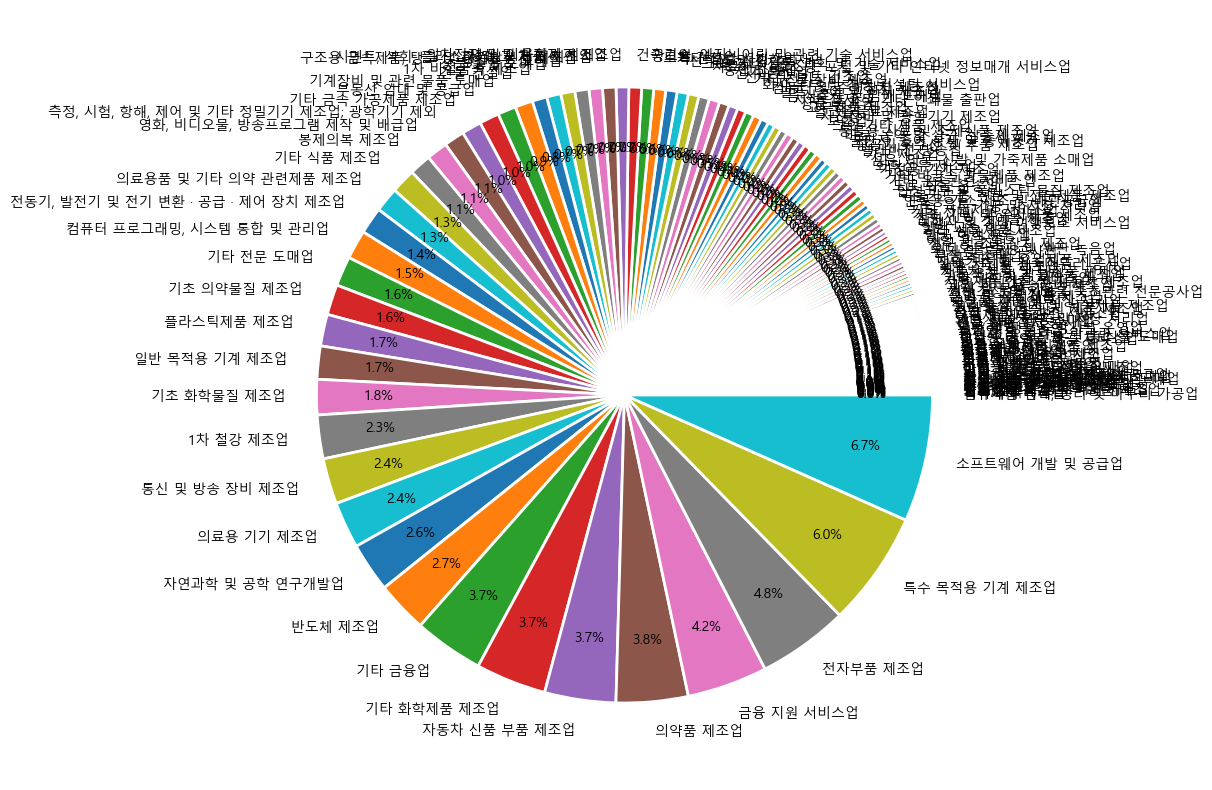

In [49]:
wedgeprops = {'width': 1, 'edgecolor': 'w', 'linewidth': 2}
stock_df.plot.pie(y = 'count', autopct = '%1.1f%%',
                  wedgeprops = wedgeprops, pctdistance = 0.8,
                  figsize = (10, 10), ylabel = '', legend = False)
plt.show() # 업종별로 나누었을때의 시각화 자료

# FinanceDataReader 이용해서 주가 데이터를 가져오기

In [55]:
import FinanceDataReader as fdr
import seaborn

In [56]:
seaborn.set_style("whitegrid")

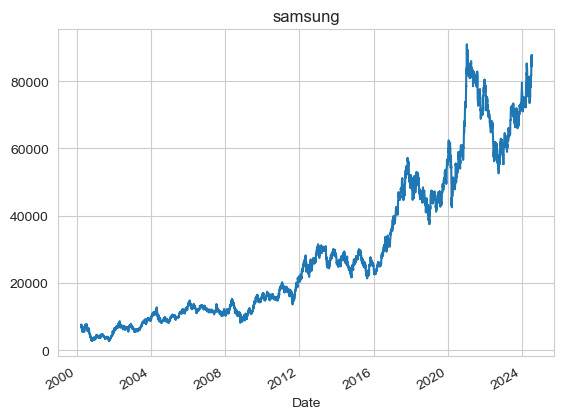

In [58]:
ss = fdr.DataReader("005930")
ss.Close.plot(label="daily")
plt.title("samsung")
plt.show()

## [1] 데이터 전처리|

### 수익률 계산하기
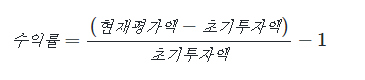

In [60]:
import matplotlib.ticker as mtick

In [61]:
seaborn.set_style("whitegrid")

In [63]:
df = fdr.DataReader("005930","20240101","20240601")
df["Ret"] = df.Close / df.Close.iloc[0] - 1

In [68]:
df

,Open,High,Low,Close,Volume,Change,Ret
Date,,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013,0.000000
2024-01-03,78500,78800,77000,77000,21753644,-0.032663,-0.032663
2024-01-04,76100,77300,76100,76600,15324439,-0.005195,-0.037688
2024-01-05,76700,77100,76400,76600,11304316,0.000000,-0.037688
2024-01-08,77000,77500,76400,76500,11088724,-0.001305,-0.038945
...,...,...,...,...,...,...,...
2024-05-27,75300,78200,74000,77200,43825202,0.017128,-0.030151
2024-05-28,76500,78000,76200,77600,18539072,0.005181,-0.025126
2024-05-29,77700,78200,75200,75200,30244875,-0.030928,-0.055276


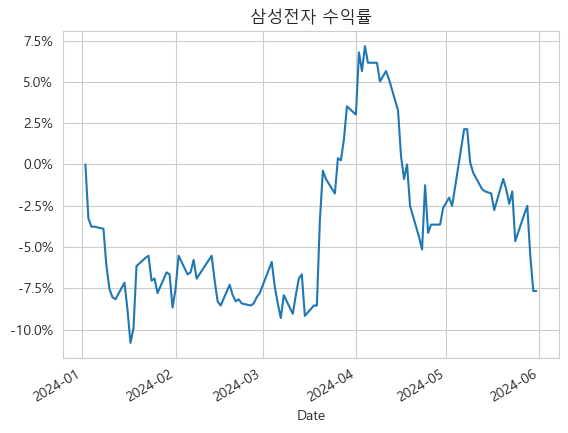

In [67]:
ax = (df.Ret * 100).plot()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("삼성전자 수익률")
plt.show()

## 데이터 수집(국내주식데이터)

In [47]:
def get_krx_stock_data(start_date, end_date):
    try:
        url = "http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd"
        headers = {
            'Referer': 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }
        
        params = {
            'bld': 'dbms/MDC/STAT/standard/MDCSTAT01501',
            'locale': 'ko_KR',
            'mktId': 'ALL',
            'trdDd': end_date,
            'share': '1',
            'money': '1',
            'csvxls_isNo': 'false',
        }
        
        response = requests.get(url, params=params, headers=headers)
        print(f"Response status code: {response.status_code}")
        print(f"Response content: {response.text[:500]}...")  # Print first 500 characters
        
        data = json.loads(response.text)
        
        if 'OutBlock_1' not in data or not data['OutBlock_1']:
            print("Error: No data found in response")
            return None
        
        df = pd.DataFrame(data['OutBlock_1'])
        
        print("DataFrame columns:", df.columns)
        print("DataFrame head:", df.head())
        
        # Rename columns
        column_map = {
            'TRD_DD': '날짜',
            'ISU_SRT_CD': '종목코드',
            'ISU_NM': '종목명',
            'MKT_NM': '시장구분',
            'TDD_CLSPRC': '종가',
            'CMPPREVDD_PRC': '대비',
            'FLUC_RT': '등락률',
            'TDD_OPNPRC': '시가',
            'TDD_HGPRC': '고가',
            'TDD_LWPRC': '저가',
            'ACC_TRDVOL': '거래량',
            'ACC_TRDVAL': '거래대금',
            'MKTCAP': '시가총액',
            'LIST_SHRS': '상장주식수'
        }
        df = df.rename(columns=column_map)
        
        # Convert numeric columns
        numeric_columns = ['종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액', '상장주식수']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
            else:
                print(f"Warning: Column '{col}' not found in DataFrame")
        
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        print(traceback.format_exc())
        return None

# 시작일과 종료일 설정 (YYYYMMDD 형식)
end_date = datetime.now().strftime("%Y%m%d")
start_date = (datetime.now() - timedelta(days=30)).strftime("%Y%m%d")

# Get stock data
stock_data = get_krx_stock_data(start_date, end_date)


Response status code: 200
Response content: {"OutBlock_1":[{"ISU_SRT_CD":"060310","ISU_CD":"KR7060310000","ISU_ABBRV":"3S","MKT_NM":"KOSDAQ","SECT_TP_NM":"중견기업부","TDD_CLSPRC":"2,470","FLUC_TP_CD":"2","CMPPREVDD_PRC":"-45","FLUC_RT":"-1.79","TDD_OPNPRC":"2,520","TDD_HGPRC":"2,525","TDD_LWPRC":"2,465","ACC_TRDVOL":"339,587","ACC_TRDVAL":"844,371,495","MKTCAP":"126,179,065,740","LIST_SHRS":"51,084,642","MKT_ID":"KSQ"},{"ISU_SRT_CD":"095570","ISU_CD":"KR7095570008","ISU_ABBRV":"AJ네트웍스","MKT_NM":"KOSPI","SECT_TP_NM":"","TDD_CLSPRC":"4,460","FL...
DataFrame columns: Index(['ISU_SRT_CD', 'ISU_CD', 'ISU_ABBRV', 'MKT_NM', 'SECT_TP_NM',
       'TDD_CLSPRC', 'FLUC_TP_CD', 'CMPPREVDD_PRC', 'FLUC_RT', 'TDD_OPNPRC',
       'TDD_HGPRC', 'TDD_LWPRC', 'ACC_TRDVOL', 'ACC_TRDVAL', 'MKTCAP',
       'LIST_SHRS', 'MKT_ID'],
      dtype='object')
DataFrame head:   ISU_SRT_CD        ISU_CD ISU_ABBRV  MKT_NM SECT_TP_NM TDD_CLSPRC FLUC_TP_CD  \
0     060310  KR7060310000        3S  KOSDAQ      중견기업부      2,470 

In [48]:
stock_data

,종목코드,ISU_CD,ISU_ABBRV,시장구분,SECT_TP_NM,종가,FLUC_TP_CD,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,MKT_ID
0,060310,KR7060310000,3S,KOSDAQ,중견기업부,2470,2,-45,-1.79,2520,2525,2465,339587,844371495,126179065740,51084642,KSQ
1,095570,KR7095570008,AJ네트웍스,KOSPI,,4460,2,-75,-1.65,4530,4535,4455,46020,206232780,201827305140,45252759,STK
2,006840,KR7006840003,AK홀딩스,KOSPI,,14070,2,-90,-0.64,14160,14240,13990,3529,49716530,186393183270,13247561,STK
3,054620,KR7054620000,APS,KOSDAQ,중견기업부,6880,1,40,0.58,6900,6900,6810,21810,149291360,136872240480,19894221,KSQ
4,265520,KR7265520007,AP시스템,KOSDAQ,우량기업부,23650,2,-650,-2.67,24250,24450,23400,208906,4957133450,361405606650,15281421,KSQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,000540,KR7000540005,흥국화재,KOSPI,,4620,2,-70,-1.49,4750,4750,4550,188040,870506830,296801019900,64242645,STK
2816,000545,KR7000541003,흥국화재우,KOSPI,,6340,2,-160,-2.46,6510,6510,6340,3334,21258800,4869120000,768000,STK
2817,003280,KR7003280005,흥아해운,KOSPI,,2300,2,-30,-1.29,2330,2350,2295,1137387,2631532430,552977267700,240424899,STK
2818,037440,KR7037440005,희림,KOSDAQ,우량기업부,6410,1,40,0.63,6350,6450,6260,205625,1312777480,89243064750,13922475,KSQ


데이터 수집


